In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import numpy as np
from scipy.interpolate import interp1d
import os

In [2]:
def read_txt(path):
    f=open(path)
    st=f.read()
    f.close()
    a=st.split('\n')
    x=[]
    x_err=[]
    y=[]
    y_err=[]
    for i in range(3,len(a)-1):
        b=a[i].split(' ')
        x.append(float(b[0]))
        x_err.append(float(b[1]))
        y.append(float(b[2]))
        y_err.append(float(b[3]))
    x=np.array(x)
    y=np.array(y)
    x_err=np.array(x_err)
    y_err=np.array(y_err)
    return x,x_err,y,y_err

In [3]:
path_0 = r'energy_tde/'
files = os.listdir(path_0)
files_txt = []
for name in files:
    keyword = 'txt'
    if keyword in name:
        files_txt.append(path_0+name)

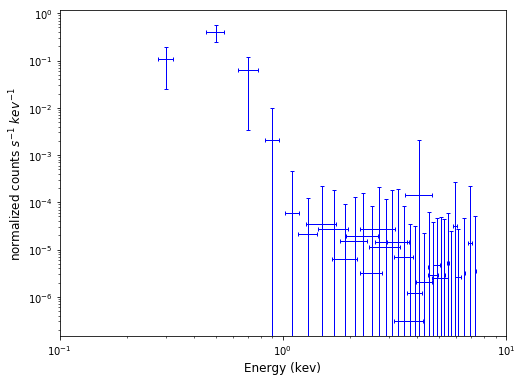

In [28]:
if __name__=='__main__':
    public_path=r'energy_tde/energy_'
    energy=np.arange(0,8.2,0.2)
    E_e=np.zeros(len(energy)-1)
    Count=np.zeros(len(energy)-1)
    Count_e=np.zeros(len(energy)-1)
    for i in range(1,191):
        if i<10:
            path=public_path+'00'+str(i)+'.txt'
        elif i<100:
            path=public_path+'0'+str(i)+'.txt'
        else:
            path=public_path+str(i)+'.txt'
        
        if path in files_txt:
            x,x_err,y,y_err=read_txt(path)
            counts=[]
            counts_err=[]
            energy_e=[]
            for j in range(1,len(energy)):
                x_list = []
                value1=0
                value2=0
                value3=0
                for m in range(len(x)):
                    if x[m] >= energy[j-1] and x[m] < energy[j]:
                        x_list.append(x[m])
                        value1 = value1+y[m]
                        value2 = value2+(y_err[m]**2)
                        value3 = value3+(x_err[m]**2)
                counts.append(value1)
                counts_err.append(value2)
                #if len(x_list) == 0:
                #    energy_e.append(0)
                #else:
                #    energy_e.append(np.std(x_list))
                energy_e.append(value3)
            energy_e = np.array(energy_e)
            counts = np.array(counts)
            counts_err = np.array(counts_err)
            E_e = E_e+energy_e
            Count = Count+counts
            Count_e = Count_e+counts_err
    E = (energy[1:]+energy[:-1])/2.
    fig = plt.figure(figsize=[8,6])
    ax = fig.add_subplot(111)
#    ax.scatter(E,Count,c='blue',marker='o',s=3)
    ax.errorbar(E,Count/190, yerr=(Count_e/190)**0.5, xerr=(E_e/190)**0.5, fmt=',', color='b', elinewidth=1, capsize=2)
    ax.set_xlabel('Energy (kev)',fontsize=12)
    ax.set_yscale('log')
    ax.set_xscale('log')
#    ax.set_ylim(10**(-2),10**3)
    ax.set_xlim(10**(-1),10**1)
    ax.set_ylabel('normalized counts $s^{-1}$ $kev^{-1}$',fontsize=12)
#    ax.set_ylim(0,12)
    plt.show()

In [26]:
print (E[4],Count[4]/190, (Count_e[4]/190)**0.5, E_e[4]/190)

2.25 3.8134188336842105e-05 0.00019411688983389858 0.29065825095513076


In [27]:
print (x[9],x_err[9],y[9],y_err[9])

0.636181474 0.01157251 0.0240032431 0.0240032431
